In [10]:
import numpy as np

In [2]:
import tensorflow as tf
#tf.enable_eager_execution()
targets = tf.constant([[1,0],[0,1],[0,1],[1,0]])
preds = tf.constant([[0.9,0.1],[0.6,0.4],[0.3,0.7],[0.8,0.2]])

/home/joaquintz/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/joaquintz/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/joaquintz/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/joaquintz/.local/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [127]:
targets = np.zeros((800, 2))
# para cada elemento quiero que:
# si x < v, x = v esto es x = max(x, v)
# si x > V, x = V esto es x = min(x, V)
# si los encadeno: x = max(min(x, V), v)

targets[10:80:10, 0] = 1
targets[:, 1] = 1 - targets[:, 0]

preds = np.zeros((800, 2))
#preds[:, 0] = 1-np.maximum(np.minimum((np.random.randn(800)/5+0.99), 0.99), 0.01)
preds[10:70:10, 0] = 1
preds[:, 1] = 1 - preds[:, 0]

print(np.all(np.argmax(targets, 1) == np.argmax(preds, 1)))
targets = tf.constant(targets)
preds = tf.constant(preds)
#
#from matplotlib import pyplot as plt
#print(plt.hist(, range=(0, 1)))

False


In [130]:
acc, acc_op = tf.metrics.auc(tf.argmax(targets, 1), tf.argmax(preds, 1))
sess = tf.Session()
sess.run(tf.local_variables_initializer())
acc_value, p = sess.run([acc_op, preds])
acc_value

0.9285713

(array([  9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 791.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


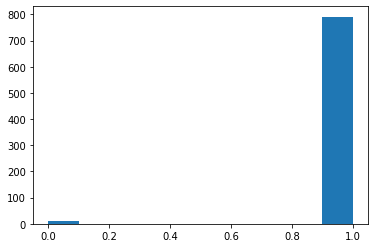

In [118]:
from matplotlib import pyplot as plt
print(plt.hist(np.argmax(p, 1), range=(0, 1)))

In [8]:
# your class weights
class_weights = tf.constant([[1.0, 2.0, 3.0]])
# deduce weights for batch samples based on their true label
weights = tf.reduce_sum(class_weights * onehot_labels, axis=1)
# compute your (unweighted) softmax cross entropy loss
unweighted_losses = tf.nn.softmax_cross_entropy_with_logits(onehot_labels, logits)
# apply the weights, relying on broadcasting of the multiplication
weighted_losses = unweighted_losses * weights
# reduce the result to get your final loss
loss = tf.reduce_mean(weighted_losses)

(0.93749976, 0.93749976)